In [31]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import gym
from time import time,sleep
sns.set_style("darkgrid")

# ENVIRONMENT - AGENT

The environment encapsules the rules/transition model ($\mathbb{P}(S_{t+1},R_{t+1}|S_t,A_t)$) that gives feedback to the agent.

Science of environments is complex, particulary for real problems simulation (e.g for autonomous vehicules).

It is easiest when then environment is already completly defined (e.g Videos Games).

### Minimal environment class
The main part of a virtual environment is the <b>step</b> function. It takes the <b>action</b> and return a new <b>state</b>, the associated <b>reward</b>, a boolean (<b>done</b>) to inticate if it is a final step, and eventually some <b>info</b>.

In [2]:
class Env:
    def __init__(self):
        self.state = 0
        self.done = False
        
    def step(self, action):
        ...
        return state, reward, done, info
        
        
    def reset(self):
        self.__init__()
        return self.state

### Exemple of environment

Environment generate a random state number. If the action is the same parity, reward is $1$, otherwise reward is $-1$

In [3]:
class Env_odd_even(Env):
    def step(self, action):
        if (action % 2 == 0 and self.state % 2 == 0) or (action % 2 == 1 and self.state % 2 == 1):
            reward = 1
        else:
            reward = -1
        self.state = np.random.randint(2)
        return self.state, reward, self.done, {}

### Minimal agent class

The <b>act</b> function return an <b>action</b> for a <b>state</b> according to the agent policy.
A smart agent may learn and update its policy.

In [4]:
class Agent:
    def __init__(self, env):
        self.env = env
    def act(self, state):
        return action
    def learn():
        pass

### Random agent
It acts randomly. It is useful as lower bound for benchmark.

In [5]:
class MyRandomAgent(Agent):
    def act(self, state):
        action = np.random.randint(2)
        return action

### Super agent
When we know the best policy. It serves as higher bound for the benchmark and it allows to compute the regret.

In [6]:
class MySuperAgent(Agent):
    def act(self, state):
        if state % 2 == 0:
            action = 0
        else:
            action = 1
        return action

### Compute rewards in agent-environment interaction 

Now, we want to compare the performance of our agents. The empirical way to do it is to observe the cumulative reward (following the agent policy).

In [7]:
def run_experiment(env, agent, nb_step):
    states = np.zeros(nb_step)
    actions = np.zeros(nb_step)
    rewards = np.zeros(nb_step)
    state = env.reset()
    for i in range(nb_step):
        action = agent.act(state)
        state, reward, done, info = env.step(action)
        rewards[i] = reward
        states[i] = state
        actions[i] = action
    return states, actions, rewards

In [8]:
nb_step = 100

Text(0.5, 1.0, 'cumulative reward - random_agent')

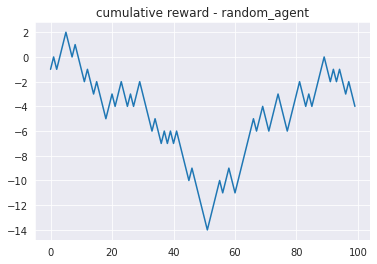

In [9]:
env = Env_odd_even()
my_random_agent = MyRandomAgent(env)
_, _, rewards = run_experiment(env, my_random_agent, nb_step)
plt.plot(rewards.cumsum())
plt.title('cumulative reward - random_agent')

Text(0.5, 1.0, 'cumulative reward - super_agent')

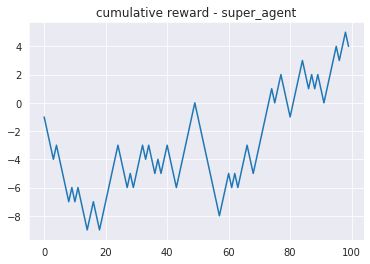

In [10]:
env = Env_odd_even()
my_super_agent = MyRandomAgent(env)
_, _, rewards = run_experiment(env, my_super_agent, nb_step)
plt.plot(rewards.cumsum())
plt.title('cumulative reward - super_agent')

### Exemple of environment with episode end
Environment generate a random state number. If the action is the same parity, reward is $1$, otherwise reward is $-1$. If the agent wins 3 consectives times, the episode ends. After 500 iterations, episode ends.

In [11]:
class Env_odd_even2(Env):
    def __init__(self):
        self.state = 0
        self.done = False
        self.nb_win = 0
        self.limit_game = 500
    def step(self, action):
        if (action % 2 == 0 and self.state % 2 == 0) or (action % 2 == 1 and self.state % 2 == 1):
            self.nb_win += 1
            reward = 1
        else:
            self.nb_win = 0
            reward = -1
        self.state = np.random.randint(2)
        if self.nb_win == 3 or self.limit_game == 0:
            self.done = True
        self.limit_game -= 1
        return self.state, reward, self.done, {}

Now, we observe the cumulative reward through trajectories (following the agent policy).

In [12]:
def run_experiment_episode(env, agent, nb_episode):
    rewards = np.zeros(nb_episode)
    for i in range(nb_episode):
        state = env.reset()
        done = False
        rews = []
        while done is False:
            action = agent.act(state)
            state, reward, done, info = env.step(action)
            rews.append(reward)
        rewards[i] = sum(rews)
    return rewards

Text(0.5, 1.0, 'cumulative reward per episode - random_agent')

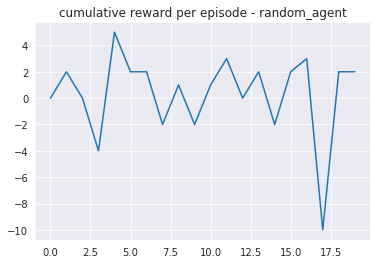

In [13]:
env = Env_odd_even2()
rewards = run_experiment_episode(env, my_random_agent, 20)
plt.plot(rewards)
plt.title('cumulative reward per episode - random_agent')

Text(0.5, 1.0, 'cumulative reward per episode - super_agent')

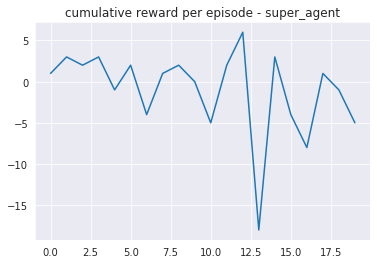

In [14]:
env = Env_odd_even2()
rewards = run_experiment_episode(env, my_super_agent, 20)
plt.plot(rewards)
plt.title('cumulative reward per episode - super_agent')

# ENVIRONMENT FROM OPENAI
https://gym.openai.com/envs/#atari

## Discrete state action environment

### NChain

<img src="images/NChain-illustration.png">

In [15]:
env = gym.make('NChain-v0')
print('description action space:', env.action_space)
print('description observation space:', env.observation_space)
print('run some random iteration:')
env.reset()
for _ in range(3):
    print()
    action = env.action_space.sample()
    print('action: ')
    print(action)
    state, reward, done, info = env.step(action)
    print('state: ')
    print(state)
    print('reward: ')
    print(reward)

description action space: Discrete(2)
description observation space: Discrete(5)
run some random iteration:

action: 
1
state: 
0
reward: 
2

action: 
1
state: 
0
reward: 
2

action: 
1
state: 
0
reward: 
2


## Discrete action continuous space environment

### CartPole
A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.
<img src="images/CartPole-v1.png">
observations: position of cart, velocity of cart, angle of pole, rotation rate of pole

In [16]:
env = gym.make('CartPole-v0')
env.reset()
print('description action space:', env.action_space)
print('description observation space:', env.observation_space)
print('run some random iteration:')
for _ in range(3):
    print()
    action = env.action_space.sample()
    print('action: ')
    print(action)
    state, reward, done, info = env.step(action)
    print('state: ')
    print(state)
    print('reward: ')
    print(reward)

description action space: Discrete(2)
description observation space: Box(4,)
run some random iteration:

action: 
0
state: 
[-0.03834748 -0.17956164 -0.00985106  0.2729462 ]
reward: 
1.0

action: 
1
state: 
[-0.04193871  0.01569948 -0.00439213 -0.02282743]
reward: 
1.0

action: 
1
state: 
[-0.04162472  0.21088415 -0.00484868 -0.31689288]
reward: 
1.0


## Continuous action-space environment

### MountainCarContinuous
An underpowered car must climb a one-dimensional hill to reach a target. Unlike MountainCar v0, the action (engine force applied) is allowed to be a continuous value.

The target is on top of a hill on the right-hand side of the car. If the car reaches it or goes beyond, the episode terminates.

On the left-hand side, there is another hill. Climbing this hill can be used to gain potential energy and accelerate towards the target. On top of this second hill, the car cannot go further than a position equal to -1, as if there was a wall. Hitting this limit does not generate a penalty (it might in a more challenging version).
<img src="images/MountainCarContinuous-v0.png">

In [17]:
env = gym.make('MountainCarContinuous-v0')
env.reset()
print('description action space:', env.action_space)
print('description observation space:', env.observation_space)
print('run some random iteration:')
for _ in range(3):
    print()
    action = env.action_space.sample()
    print('action: ')
    print(action)
    state, reward, done, info = env.step(action)
    print('state: ')
    print(state)
    print('reward: ')
    print(reward)

description action space: Box(1,)
description observation space: Box(2,)
run some random iteration:

action: 
[-0.9203204]
state: 
[-0.44013313 -0.00201458]
reward: 
-0.08469896232959542

action: 
[-0.97184056]
state: 
[-0.44422494 -0.00409181]
reward: 
-0.09444740749090422

action: 
[0.11395625]
state: 
[-0.44873551 -0.00451057]
reward: 
-0.0012986026971118004


### LunarLanderContinuous
Landing pad is always at coordinates (0,0). Coordinates are the first two numbers in state vector. Reward for moving from the top of the screen to landing pad and zero speed is about 100..140 points. If lander moves away from landing pad it loses reward back. Episode finishes if the lander crashes or comes to rest, receiving additional -100 or +100 points. Each leg ground contact is +10. Firing main engine is -0.3 points each frame. Solved is 200 points. Landing outside landing pad is possible. Fuel is infinite, so an agent can learn to fly and then land on its first attempt. Action is two real values vector from -1 to +1. First controls main engine, -1..0 off, 0..+1 throttle from 50% to 100% power. Engine can't work with less than 50% power. Second value -1.0..-0.5 fire left engine, +0.5..+1.0 fire right engine, -0.5..0.5 off.
<img src="images/LunarLanderContinuous-v2.png">

In [18]:
env = gym.make('LunarLanderContinuous-v2')
env.reset()
print('description action space:', env.action_space)
print('description observation space:', env.observation_space)
print('run some random iteration:')
print()
for _ in range(3):
    action = env.action_space.sample()
    print('action: ')
    print(action)
    state, reward, done, info = env.step(action)
    print('state: ')
    print(state)
    print('reward: ')
    print(reward)

description action space: Box(2,)
description observation space: Box(8,)
run some random iteration:

action: 
[0.02376777 0.9631816 ]
state: 
[-0.00659113  1.396296   -0.32271746 -0.32830462  0.00583573  0.03817365
  0.          0.        ]
reward: 
1.3302080856768226
action: 
[-0.5150008   0.24837618]
state: 
[-0.009799    1.3883088  -0.32272336 -0.35499713  0.00774306  0.03815027
  0.          0.        ]
reward: 
-1.334385548143075
action: 
[ 0.97167176 -0.42493665]
state: 
[-0.01290302  1.381084   -0.31287506 -0.32111612  0.01018162  0.04877593
  0.          0.        ]
reward: 
3.322953254989602


## High space dimension environment

### Atari games


In [19]:
env = gym.make('Breakout-v0')
env.reset()
print('description action space:', env.action_space)
print('description observation space:', env.observation_space)
print('run some random iteration:')
print()
for _ in range(3):
    action = env.action_space.sample()
    print('action: ')
    print(action)
    state, reward, done, info = env.step(action)
    print('state: ')
    print(state)
    print('reward: ')
    print(reward)

description action space: Discrete(4)
description observation space: Box(210, 160, 3)
run some random iteration:

action: 
1
state: 
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
reward: 
0.0
action: 
2
state: 
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
reward:

# Run Random agent in open ai gym

In [20]:
env = gym.make('MountainCarContinuous-v0')

In [29]:
class RandomAgent(Agent):
    def act(self, state):
            return self.env.action_space.sample()

Text(0.5, 1.0, 'cumulative reward per episode - rand_agent')

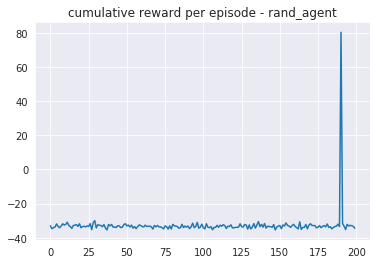

In [30]:
rand_agent = RandomAgent(env)
rewards = run_experiment_episode(env, rand_agent, 200)
plt.plot(rewards)
plt.title('cumulative reward per episode - rand_agent')

# TODO add example of bandit env